In [1]:
import inspect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

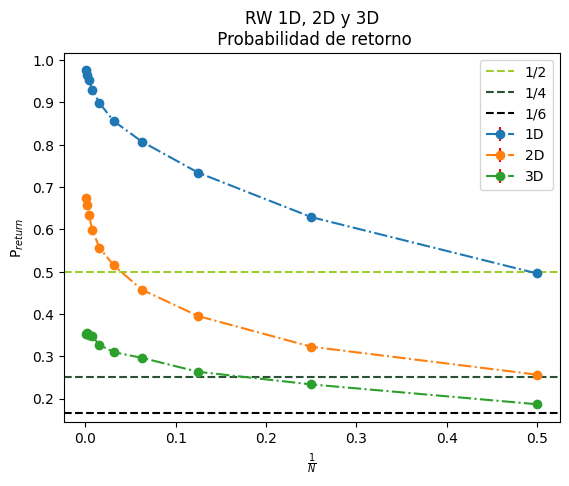

In [2]:
df1 = pd.read_csv("Datos/caminante_1d.csv")
df2 = pd.read_csv("Datos/caminante_2d.csv")
df3 = pd.read_csv("Datos/caminante_3d.csv")
df41 = pd.read_csv("Datos/caminante_4d.csv")
df42 = pd.read_csv("Datos/caminante_4d_2.csv")
df51 = pd.read_csv("Datos/caminante_5d_1.csv")
df52 = pd.read_csv("Datos/caminante_5d_2.csv")
df61 = pd.read_csv("Datos/caminante_6d_1.csv")
df62 = pd.read_csv("Datos/caminante_6d_2.csv")
df71 = pd.read_csv("Datos/caminante_7d_1.csv")
df72 = pd.read_csv("Datos/caminante_7d_2.csv")




plt.errorbar(1/df1['n_max'],df1['prob'],yerr=df1["error"],marker="o",ls="-.",ecolor="red",label="1D")
plt.errorbar(1/df2['n_max'],df2['prob'],yerr=df2["error"],marker="o",ls="-.",ecolor="red",label="2D")
plt.errorbar(1/df3['n_max'],df3['prob'],yerr=df3["error"],marker="o",ls="-.",ecolor="red",label="3D")

plt.axhline(1/2,ls="--",color="#9FCC2E",label="1/2")
plt.axhline(1/4,ls="--",color="#295135",label="1/4")
plt.axhline(1/6,ls="--",color="#000000",label="1/6")

plt.title("RW 1D, 2D y 3D\n Probabilidad de retorno")
plt.xlabel('$\\frac{1}{N}$')
plt.ylabel('P$_{return}$')
plt.legend()
plt.show()

In [7]:
def adjust(df,model,dim,ind=0):
    x = 1/df["n_max"]
    y = df["prob"]
    y_err=df["error"]

    x=x[ind:]
    y=y[ind:]
    y_err=y_err[ind:]

    params, covariance = curve_fit(model, x, y, sigma=y_err)

    residuals = (y - model(x, *params))/y_err
    chi_squared = np.sum(residuals**2)

    # Calcula el número de grados de libertad
    num_params = len(params)
    num_data_points = len(y)
    degrees_of_freedom = num_data_points - num_params

    # Calcula el chi-cuadrado reducido
    reduced_chi_squared = chi_squared / degrees_of_freedom

    ec_str="modelo de ajuste"
    plt.errorbar(x,y,yerr=y_err,marker="o",ls="",ecolor="red",label="data")

    #plt.axhline(1/2,ls="--",label="1/2")
    plt.plot(x,model(x,*params),label=inspect.getsource(model))
    plt.title(f"RW {dim}D")
    plt.xlabel("1/N")
    plt.ylabel("$P_{return}$")
    plt.legend()
    plt.show()

    for i in range(len(params)):
        print(f"param_{i}: {params[i]:.15f} sd_{i}: {np.sqrt(covariance[i,i]):.15f}")

    print(f"Chi-cuadrado reducido: {reduced_chi_squared:.15f}")

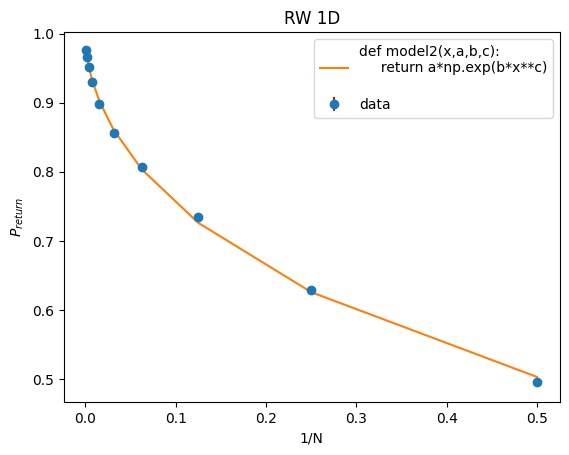

param_0: 0.996839576419925 sd_0: 0.002714008534404
param_1: -1.005168905964710 sd_1: 0.019889168171428
param_2: 0.555024813872591 sd_2: 0.012881794178254
Chi-cuadrado reducido: 2.268805526147650


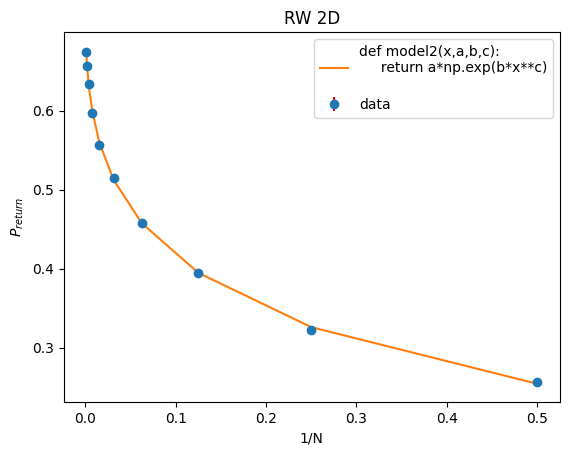

param_0: 0.750364013032574 sd_0: 0.005972530085054
param_1: -1.404396399099187 sd_1: 0.011590547924262
param_2: 0.376208427345810 sd_2: 0.008392032033428
Chi-cuadrado reducido: 0.492923879211131


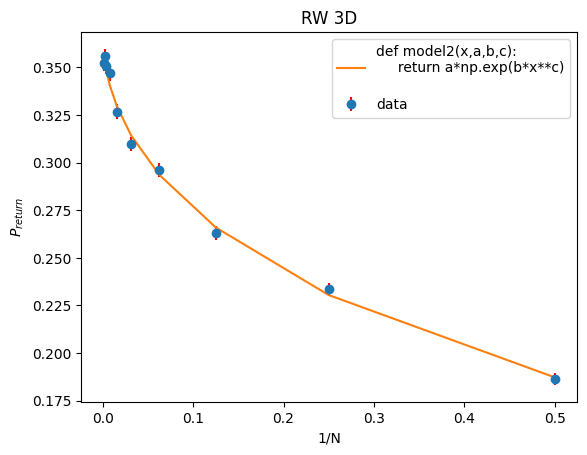

param_0: 0.365946507754253 sd_0: 0.004551101201020
param_1: -0.970137472155968 sd_1: 0.034738417345389
param_2: 0.534584239943301 sd_2: 0.036156759889769
Chi-cuadrado reducido: 1.345050355379890


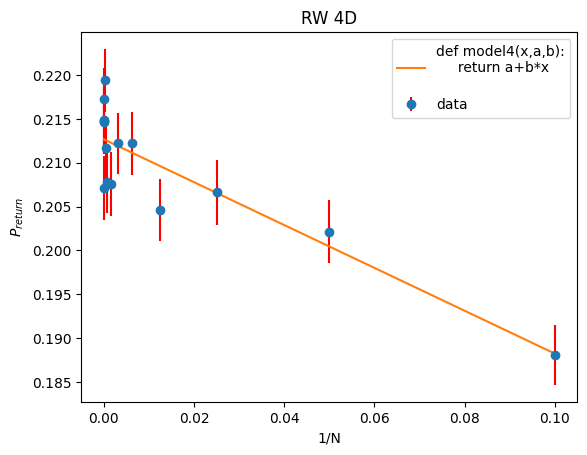

param_0: 0.212658680465790 sd_0: 0.001092488872123
param_1: -0.244011316161039 sd_1: 0.035222205732006
Chi-cuadrado reducido: 1.111296515267197


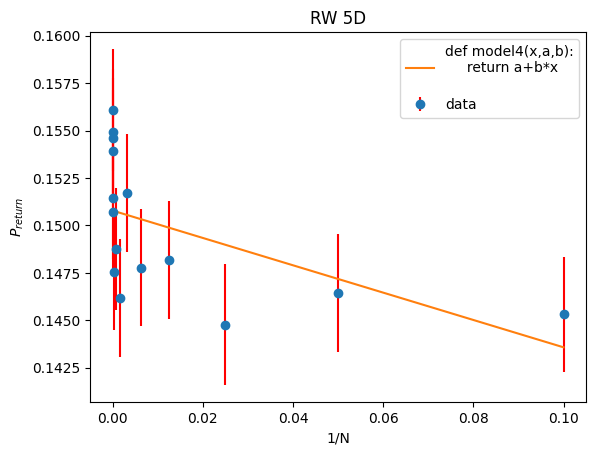

param_0: 0.150781595858766 sd_0: 0.000933865179467
param_1: -0.072071331928062 sd_1: 0.030484725579019
Chi-cuadrado reducido: 1.045653737245653


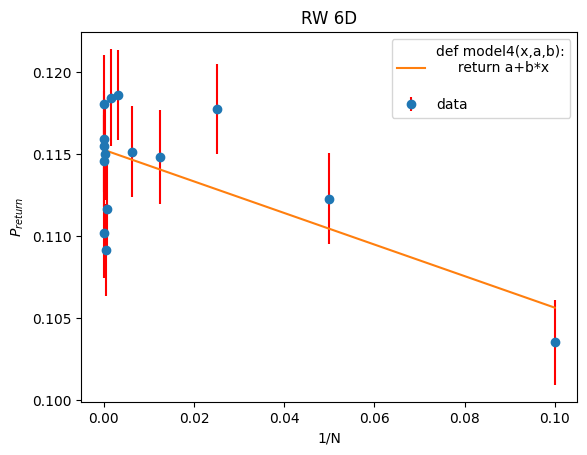

param_0: 0.115277785959966 sd_0: 0.000963456663959
param_1: -0.096245615759495 sd_1: 0.030355510878618
Chi-cuadrado reducido: 1.393142552702158


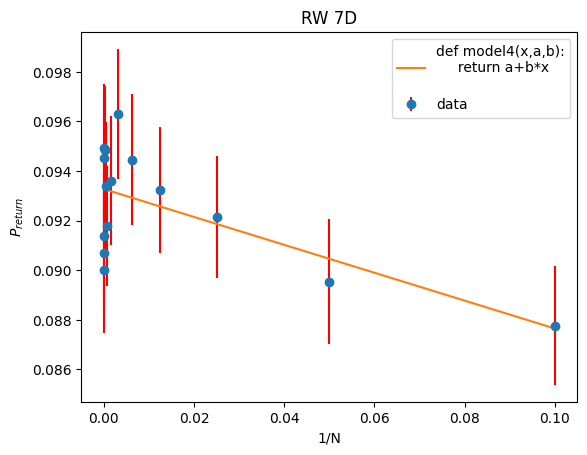

param_0: 0.093272929192025 sd_0: 0.000531756731077
param_1: -0.056240722183439 sd_1: 0.017043543163944
Chi-cuadrado reducido: 0.522835211456879


In [8]:
def model1(x,a,b,c,d):
     return a*np.exp(b*x**c)+d

def model2(x,a,b,c):
     return a*np.exp(b*x**c)

def model3(x,a,b,c):
     return a*np.exp(b*x)+c

def model4(x,a,b):
     return a+b*x


adjust(df1,model2,1)
adjust(df2,model2,2)
adjust(df3,model2,3)
adjust(df41,model4,4)
#adjust(df42,model4,4)
adjust(df51,model4,5)
#adjust(df52,model2,5)
adjust(df61,model4,6)
#adjust(df62,model2,6)
adjust(df71,model4,7)
#adjust(df72,model2,7)
